Objective:
Build a basic machine learning model to predict house prices using the Boston Housing
Dataset (or any other public dataset like Titanic Survival or Iris Classification, depending on
preference).
Task Details:
1. Load the dataset using Python (preferred: pandas, scikit-learn).
2. Perform basic data cleaning and preprocessing.
3. Do exploratory data analysis (EDA) – visualize key relationships.
4. Split the data into training and test sets.
5. Train a simple regression/classification model (Linear Regression, Decision Tree, or
Random Forest).
6. Evaluate the model using suitable metrics (e.g., RMSE, Accuracy, etc.).
7. Share the code on GitHub and send the link with a brief explanation (max 300 words)
on:
○ What you have done
○ Why you have chosen a specific model
○ Any challenges you have faced




In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Fetch dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Save to CSV
df.to_csv("california_housing.csv", index=False)


In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df['MedHouseVal'] = housing.target

In [13]:
df.head()         # Preview top rows
df.info()         # Check data types and non-null values
df.describe()     # Statistical summary for numeric columns
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [14]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values
df.fillna(method='ffill', inplace=True)


<ipython-input-14-2308dceacbaf>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [15]:
df.drop_duplicates(inplace=True)

Original Skewness:
AveOccup       97.639561
AveBedrms      31.316956
AveRooms       20.697869
Population      4.935858
MedInc          1.646657
MedHouseVal     0.977763
Latitude        0.465953
HouseAge        0.060331
Longitude      -0.297801
dtype: float64

Skewness After Transformation:
AveBedrms      12.745222
AveRooms        4.850183
AveOccup        3.879679
MedHouseVal     0.977763
Population      0.929024
Latitude        0.465953
MedInc          0.226083
HouseAge        0.060331
Longitude      -0.297801
dtype: float64


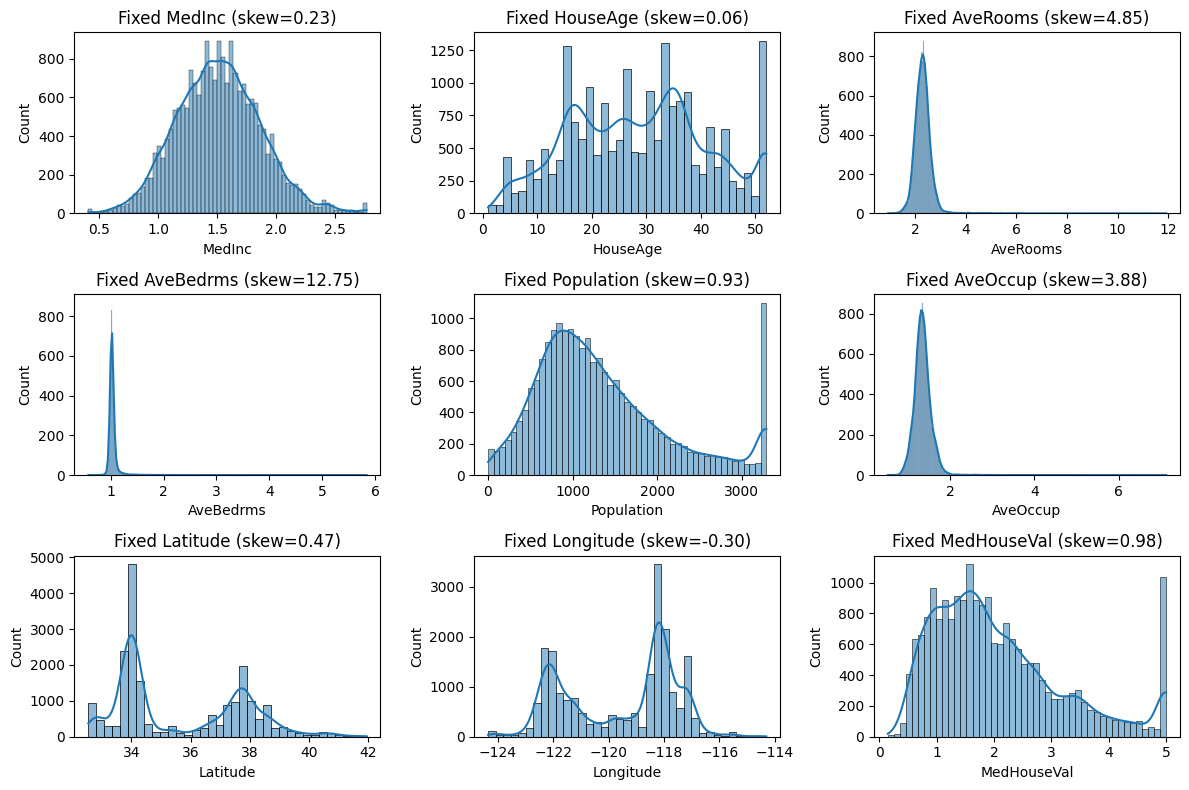

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Original Skewness:")
print(df.skew().sort_values(ascending=False))

def fix_skewness(df, feature, method='log'):
    """Apply transformations to reduce skewness"""
    if method == 'log':
        return np.log1p(df[feature])  # log(1+x) to handle zeros
    elif method == 'sqrt':
        return np.sqrt(df[feature])
    elif method == 'winsorize':
        upper = df[feature].quantile(0.95)
        return np.where(df[feature] > upper, upper, df[feature])
    return df[feature]

# Apply transformations
df['AveOccup'] = fix_skewness(df, 'AveOccup', 'log')
df['MedInc'] = fix_skewness(df, 'MedInc', 'log')
df['AveRooms'] = fix_skewness(df, 'AveRooms', 'sqrt')
df['AveBedrms'] = fix_skewness(df, 'AveBedrms', 'sqrt')
df['Population'] = fix_skewness(df, 'Population', 'winsorize')

# Verify
print("\nSkewness After Transformation:")
print(df.skew().sort_values(ascending=False))

#  Visualize
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Fixed {col} (skew={df[col].skew():.2f})')
plt.tight_layout()
plt.show()

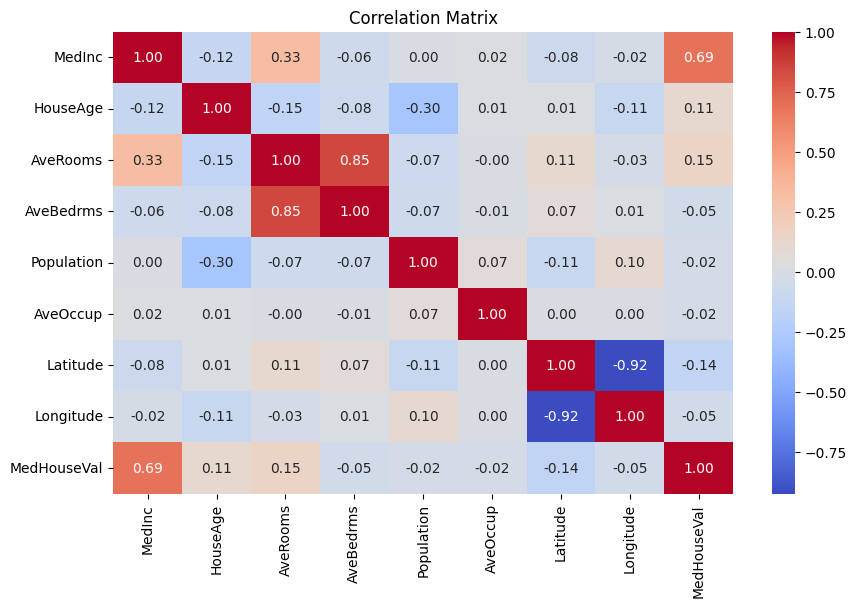

In [18]:
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

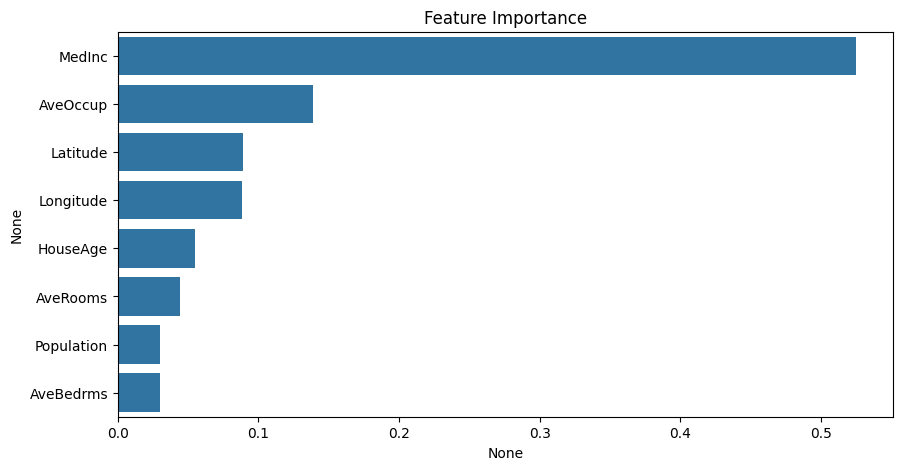

In [19]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)  # Features
y = df['MedHouseVal']               # Target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (16512, 8), Test size: (4128, 8)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize & train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [12]:
from joblib import dump

# Save the trained model to a file
dump(model, 'california_housing_rf_model.joblib')
print("Model saved as 'california_housing_rf_model.joblib'")

Model saved as 'california_housing_rf_model.joblib'


In [14]:
import numpy as np
# Calculate RMSE & R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.5053
R² Score: 0.8051


In [15]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.32754256845930246


In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.2553684927247781


In [19]:
from joblib import load

# Load the saved model
model = load('california_housing_rf_model.joblib')

# Format the case as a DataFrame (single row)
import pandas as pd
new_case = pd.DataFrame({
    'MedInc': [2.2596],
    'HouseAge': [40.0],
    'AveRooms': [3.63466],
    'AveBedrms': [0.981265],
    'Population': [1919.0],
    'AveOccup': [4.494145],
    'Latitude': [34.01],
    'Longitude': [-118.16]
})

# Predict
predicted_value = model.predict(new_case)[0]
print(f"Predicted Value: {predicted_value:.2f}")


Predicted Value: 1.43


In [20]:
import random

# Randomly pick one sample from the test set
random_idx = random.choice(X_test.index)
random_case = X_test.loc[[random_idx]]  # Keep as DataFrame to match model input format
true_value = y_test.loc[random_idx]

print("Random Case Features:")
print(random_case)
print(f"\nTrue Median House Value: {true_value:.2f}")

Random Case Features:
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
9416  6.2113      52.0  5.841791   1.122388      1177.0  1.756716     37.86   

      Longitude  
9416    -122.48  

True Median House Value: 5.00
